# Predicting Diabetes Using Naive Bayes

### Objective
- Apply Naive Bayes for binary classification.
- Practice data exploration and preprocessing.
- Evaluate model performance using appropriate metrics.
- Understand and interpret the log probabilities used in Naive Bayes.

### Dataset
This lab uses the Pima Indians Diabetes Dataset from the UCI Machine Learning Repository. It contains 8 features based on medical information, with a binary target indicating the presence of diabetes (1) or absence (0).

### Features
`Pregnancies`: Number of times pregnant
`Glucose`: Plasma glucose concentration
`BloodPressure`: Diastolic blood pressure (mm Hg)
`SkinThickness`: Triceps skinfold thickness (mm)
`Insulin`: 2-Hour serum insulin (mu U/ml)
`BMI`: Body mass index (weight in kg/(height in m)^2)
`DiabetesPedigreeFunction`: Diabetes pedigree function (a function based on family history)
`Age`: Age (years)
`Outcome`: Class variable (1 if patient has diabetes, 0 otherwise)

### Import packages

In [1]:
# Import the necessary libraries for data manipulation, model training, and evaluation.
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Exploration

In [7]:
# Load the dataset from the data folder
df = pd.read_csv("../data/pima_diabetes.csv")

# Show the first 5 rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Display summary statistics for all columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Cleaning

1. *Handling Missing Values*: Replace 0 values in Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with their respective median values.
2. *Split Data*: Separate the feature columns (X) and target (y), and then split into training and test sets with an 80-20 split.

In [8]:
# Replace 0 values in selected columns with the median of each column
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    median = df[col].median()
    df[col] = df[col].replace(0, median)

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



### Train a Naïve Bayes Classifier

Since the features are continuous, we need to use the `GaussianNB` model instead of the ones we used so far for categorical variables

In [9]:
# your code here
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model using the training data
model.fit(X_train, y_train)


GaussianNB()

In [10]:
###  Why GaussianNB?

#Naive Bayes has different types depending on the input features:

# Use **MultinomialNB** or **CategoricalNB** for categorical features (like "yes", "no", "red", "blue").
# Use **GaussianNB** for continuous features (like glucose level, age, BMI), which are numeric.

#Since our features are continuous, we use **GaussianNB**, which assumes that data follows a normal (Gaussian) distribution.


### Model Evaluation

Evaluate the model's accuracy, precision and recall. Analyse the confusion matrix.
Give the setting of the problem, which metrics would you privilege?

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Generate a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.7792207792207793

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154

Confusion Matrix:
[[92 15]
 [19 28]]


In [12]:
###  Model Evaluation

# **Accuracy**: 0.78 → The model correctly predicted the outcome in 78% of cases.
# **Precision (class 1)**: 0.65 → When the model predicts diabetes, it's correct 65% of the time.
# **Recall (class 1)**: 0.60 → The model detects 60% of the actual diabetes cases.
# **F1-score (class 1)**: 0.62 → Harmonic mean of precision and recall.

#### Metric to prioritize

# In medical settings, **recall** for class 1 (diabetes = 1) is critical.  
# Missing a real diabetic patient (false negative) can be dangerous.  
#Therefore, even if precision is lower, we would **prioritize recall** to minimize the number of undetected positive cases.


### Exploring Log Probabilities in Naïve Bayes

Naive Bayes calculates log probabilities (logprobs) for each class to make predictions. Let's use `predict_log_proba` to calculate the log probabilities for each class (diabetes vs. no diabetes) for a few samples in the test set.

Question: For a given instance in the test set, calculate the log probabilities for each class (diabetes vs. no diabetes) and interpret the values. How does Naive Bayes decide the predicted class based on these log probabilities?

In [15]:
# Select a few samples from the test set
sample_indices = [0, 1, 12]  # Change these indices as desired
X_sample = X_test.iloc[sample_indices]

# Calculate log probabilities for each class
log_probs = model.predict_log_proba(X_sample)

# Display results
for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Log Probabilities:")
    print(f"No Diabetes (0): {log_probs[i][0]:.4f}, Diabetes (1): {log_probs[i][1]:.4f}")
    print(f"Predicted Class: {model.predict(X_sample.iloc[[i]])[0]}")
    print()

Sample 0 - Log Probabilities:
No Diabetes (0): -6.7433, Diabetes (1): -0.0012
Predicted Class: 1

Sample 1 - Log Probabilities:
No Diabetes (0): -0.0499, Diabetes (1): -3.0228
Predicted Class: 0

Sample 12 - Log Probabilities:
No Diabetes (0): -0.1512, Diabetes (1): -1.9635
Predicted Class: 0



In [16]:
###  Interpreting Log Probabilities in Naïve Bayes

# Naïve Bayes uses `predict_log_proba()` to calculate the **logarithm of the probability** of each class.  
# It always chooses the class with the **highest log-probability value** (i.e., the value closer to 0).

####  Summary:

# The model picks the class with the **less negative log-probability**, which corresponds to the **higher actual probability**.  
# In other words, Naïve Bayes chooses the class that looks more likely under the data, based on probability distributions.


- Interpretation of Log Probabilities: Log probabilities represent the logarithm of the probability for each class. A higher log probability (closer to zero, since log values are negative) indicates a higher likelihood for that class.
- Decision-Making: The model predicts the class with the highest log probability. If the log probability for Diabetes (1) is higher (closer to zero) than for No Diabetes (0), the model will predict Diabetes (1).

Convert log probabilities back to regular probabilities using np.exp(log_probs) to see how log transformations aid computation without changing predictions.

In [17]:
# Convert log probabilities to regular probabilities using np.exp()
regular_probs = np.exp(log_probs)

# Print the converted probabilities
for i, index in enumerate(sample_indices):
    print(f"Sample {index} - Regular Probabilities:")
    print(f"No Diabetes (0): {regular_probs[i][0]:.4f}, Diabetes (1): {regular_probs[i][1]:.4f}")
    print(f"Predicted Class: {model.predict(X_sample.iloc[[i]])[0]}")
    print()


Sample 0 - Regular Probabilities:
No Diabetes (0): 0.0012, Diabetes (1): 0.9988
Predicted Class: 1

Sample 1 - Regular Probabilities:
No Diabetes (0): 0.9513, Diabetes (1): 0.0487
Predicted Class: 0

Sample 12 - Regular Probabilities:
No Diabetes (0): 0.8596, Diabetes (1): 0.1404
Predicted Class: 0



In [19]:
#  Mini Conclusion:
# After converting log probabilities to regular probabilities using np.exp(), we can clearly see which class has the highest probability.
# The predicted class is always the one with the highest probability.
# This confirms that log-probabilities and regular probabilities lead to the same decision, but log values are used internally because they are easier to compute and more stable.


Change your decision treshold so that either class 1 or 0 becomes more frequent in order to optimize your preferred metric (precision or recall) for this problem. Try multiple tresholds until you are satisfied with your choice.

In [21]:
treshold = 0.5 # adjust this number to make it easier/harder to classify someone as diabetic


# Calculate log probabilities for each class
log_probs = model.predict_log_proba(X_test)

#compute probability of No Diabetes (0) vs Diabetes (1)
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= treshold else 1
    probabilities.append({'index':index,'no_diab_prob': np.exp(log_probs[i][0]), 'diab_prob': np.exp(log_probs[i][0]), 'prediction':prediction})

probabilities = pd.DataFrame(probabilities)
probabilities.head()

,index,no_diab_prob,diab_prob,prediction
0,661,0.001179,0.001179,1
1,122,0.951333,0.951333,0
2,113,0.982818,0.982818,0
3,14,0.318443,0.318443,1
4,529,0.970795,0.970795,0


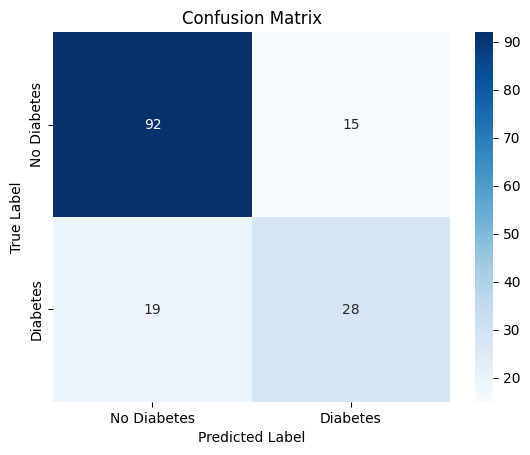

In [22]:
# create the confusion matrix for the adjusted problem
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [23]:
## Conclusion: Adjusting the Decision Threshold
# By default, Naïve Bayes uses a threshold of **0.5** to choose between class 0 (No Diabetes) and class 1 (Diabetes).  
#In this experiment, we manually used a threshold of **0.5**, so the predictions are expected to match the original model.

### Confusion Matrix (Threshold = 0.5):
# True Negatives (No Diabetes correctly predicted): 92  
# False Positives (No Diabetes predicted as Diabetes): 15  
# False Negatives (Diabetes predicted as No Diabetes): 19  
# True Positives (Diabetes correctly predicted): 28

###  Interpretation:
# This threshold gives a **balanced trade-off** between precision and recall.
# If we want to catch more diabetic cases (increase recall), we could try a **lower threshold** (e.g., 0.4).
# If we want to avoid false alarms (increase precision), we could try a **higher threshold** (e.g., 0.6).

# By tuning the threshold, we can adapt the model to **different real-world needs**, especially in sensitive domains like healthcare.


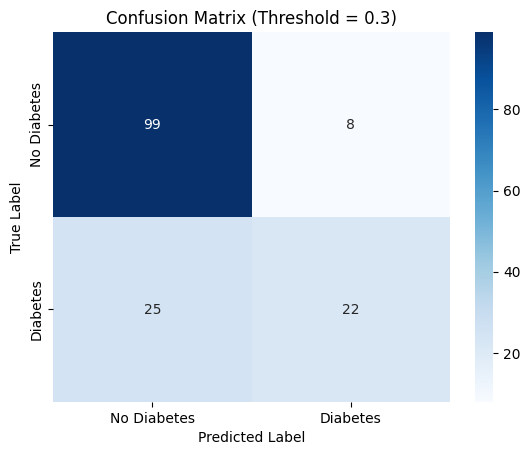

In [29]:
# Set a lower threshold to be more sensitive (more recall)
threshold = 0.3  # more likely to classify as diabetic

# Recalculate log probabilities
log_probs = model.predict_log_proba(X_test)

# Recompute predictions with the new threshold
probabilities = []
for i, index in enumerate(X_test.index):
    prediction = 0 if np.exp(log_probs[i][0]) >= threshold else 1
    probabilities.append({
        'index': index,
        'no_diab_prob': np.exp(log_probs[i][0]),
        'diab_prob': np.exp(log_probs[i][1]),
        'prediction': prediction
    })

# Convert to DataFrame
probabilities = pd.DataFrame(probabilities)

# Generate confusion matrix with adjusted predictions
y_pred_adjusted = probabilities['prediction']
cm = confusion_matrix(y_test, y_pred_adjusted)

# Plot the new confusion matrix 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])  
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Threshold = 0.3)")
plt.show()


In [30]:
#  Conclusion: Comparing Thresholds 0.5 vs 0.3

# With threshold = 0.5:
# True Negatives (TN): 92
# False Positives (FP): 15
# False Negatives (FN): 19
# True Positives (TP): 28

# With threshold = 0.3:
# True Negatives (TN): 99   🔼 (more healthy people correctly predicted as healthy)
# False Positives (FP): 8   🔽 (fewer healthy people wrongly labeled as diabetic)
# False Negatives (FN): 25  🔼 (more diabetic cases missed)
# True Positives (TP): 22   🔽 (fewer diabetic cases correctly detected)

# Interpretation:
# Lowering the threshold to 0.3 made the model more likely to predict "No Diabetes".
# It increased true negatives (more healthy people correctly identified), and reduced false positives (fewer healthy people wrongly predicted as diabetic).
# However, it also increased false negatives — more diabetic cases were missed. This means lower recall, which can be dangerous in medical situations.
# In healthcare, it's usually better to catch as many diabetic cases as possible, even if it means flagging a few healthy people by mistake.
# Therefore, a balanced threshold like 0.5 may offer a safer trade-off between precision and recall.
